# Extracting Industries from AboutC Column

In [1]:
# en_core_web_lg

import spacy
from spacy import displacy
from spacy.matcher import Matcher



def collect_sents(matcher, doc, i, matches):
    match_id, start, end = matches[i]
    span = doc[start : end]  # matched span
    sent = span.sent  # sentence containing matched span
    # append mock entity for match in displaCy style to matched_sents
    # get the match span by ofsetting the start and end of the span with the
    # start and end of the sentence in the doc
    match_ents = [{'start': span.start_char - sent.start_char,
                   'end': span.end_char - sent.start_char,
                   'label': 'MATCH'}]
    matched_sents.append({'text': sent.text, 'ents': match_ents })
    
    

In [2]:
import os
import json
import string
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
import pandas as pd
import re
pd.options.mode.chained_assignment = None  # default='warn'

df_ori = pd.read_csv('../data/data job posts.csv')
df_ori.head()
print(df_ori.shape)
df = df_ori.drop_duplicates(['jobpost','Title'])
print(df.shape)
print("Removed {0} duplicates (based on jobpost + Title)".format(df_ori.shape[0]-df.shape[0]))

(19001, 24)
(18892, 24)
Removed 109 duplicates (based on jobpost + Title)


In [3]:
df['AboutC'].head()

0                                                  NaN
1    The International Research & Exchanges Board (...
2    The Caucasus Environmental NGO Network is a\nn...
3                                                  NaN
4                                                  NaN
Name: AboutC, dtype: object

In [150]:
nlp = spacy.load('en_core_web_sm')
matcher = Matcher(nlp.vocab)
matched_sents = [] # collect data of matched sentences to be visualized

pattern = [{'POS':'ADJ'},{'ORTH': '-'}, {'POS':'NOUN', 'OP':'+'}, {'LOWER': 'organization'}]
matcher.add('company has', collect_sents, pattern)  # add pattern
pattern = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'organization'}]
matcher.add('company has', collect_sents, pattern)  # add pattern
pattern = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'company'}]
matcher.add('company has', collect_sents, pattern)  # add pattern
pattern = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'services'}]
matcher.add('company has', collect_sents, pattern)  # add pattern
pattern = [{'LOWER': 'company'}, {'POS':'VERB'}, {'POS':'NOUN', 'OP':'+'}]
matcher.add('company has', collect_sents, pattern)  # add pattern
pattern = [{'LOWER':'provider'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'}  , {'POS':'CCONJ','OP':'+'}, {'POS':'NOUN','OP':'+'}]
matcher.add('provider of', collect_sents, pattern)  # add pattern
pattern = [{'LOWER':'provider'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'}]
matcher.add('provider of', collect_sents, pattern)  # add pattern
pattern = [{'POS':'VERB'}, {'POS':'NOUN',  'OP': '+'} ]
matcher.add('verb_noun', collect_sents, pattern)  # add pattern
pattern = [{'POS':'ADJ'}, {'POS':'NOUN',  'OP': '+'} ]
matcher.add('verb_noun', collect_sents, pattern)  # add pattern
pattern = [{'POS':'NOUN'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'} ]
matcher.add('verb_noun', collect_sents, pattern)  # add pattern
pattern = [{'POS':'NOUN'}, {'POS':'NOUN','OP':'+'} ]
matcher.add('verb_noun', collect_sents, pattern)  # add pattern

text = """"Aregak" Universal Credit Organization CJSC was founded
by the United Methodist Committee on Relief (UMCOR) in 2006. Aregak UCO's
27 branches and 3 representations throughout Armenia and Nagorno Karabakh
support the economic development of small and medium entrepreneurs with
high quality, accessible and reliable financial services. Please visit
www.aregak.am for more information."""
text = re.sub(r'\s+', ' ', text)

doc = nlp(text)
# for token in doc:
#     print("{0}/{1} <--{2}-- {3}/{4}".format(
#         token.text, token.tag_, token.dep_, token.head.text, token.head.tag_))
matches = matcher(doc)
displacy.render(matched_sents, style='ent', manual=True, jupyter=True)

In [145]:
matched_sents

[{'text': 'The "Transport PIU" SI (PIU) of the RA Ministry of Transport and Communication (MoTC) is to effectively implement investment and development projects in the transport sphere developed by the MoTC and regional administrative bodies and approved by the Government of the RA at the expenses of the State Budget and the funding provided to the Republic of Armenia by foreign states and international financing organizations.',
  'ents': [{'start': 104, 'end': 124, 'label': 'MATCH'}]},
 {'text': 'The "Transport PIU" SI (PIU) of the RA Ministry of Transport and Communication (MoTC) is to effectively implement investment and development projects in the transport sphere developed by the MoTC and regional administrative bodies and approved by the Government of the RA at the expenses of the State Budget and the funding provided to the Republic of Armenia by foreign states and international financing organizations.',
  'ents': [{'start': 129, 'end': 149, 'label': 'MATCH'}]},
 {'text': 'The

In [95]:
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
      token.shape_, token.is_alpha, token.is_stop)

" " PUNCT `` punct " False False
" " PUNCT `` punct " False False
Kamurj kamurj PROPN NNP dep Xxxxx True False
" " PUNCT '' punct " False False
UCO uco PROPN NNP compound XXX True False
CJSC cjsc PROPN NNP nsubj XXXX True False
is be VERB VBZ aux xx True True
providing provide VERB VBG ROOT xxxx True False
micro micro ADJ JJ amod xxxx True False
and and CCONJ CC cc xxx True True
small small ADJ JJ conj xxxx True False
loans loan NOUN NNS dobj xxxx True False
to to PART TO prep xx True True

 
 SPACE   
 False False
low low ADJ JJ amod xxx True False
- - PUNCT HYPH punct - False False
income income NOUN NN compound xxxx True False
families family NOUN NNS pobj xxxx True False
in in ADP IN prep xx True True
urban urban ADJ JJ amod xxxx True False
and and CCONJ CC cc xxx True True
rural rural ADJ JJ conj xxxx True False
areas area NOUN NNS pobj xxxx True False
throughout throughout ADP IN prep xxxx True True
Armenia armenia PROPN NNP pobj Xxxxx True False
. . PUNCT . punct . False False
M

## Iterate Through All

In [3]:
nlp = spacy.load('en_core_web_sm')
matcher = Matcher(nlp.vocab)
matched_sents = [] # collect data of matched sentences to be visualized

pattern = [{'POS':'ADJ'},{'ORTH': '-'}, {'POS':'NOUN', 'OP':'+'}, {'LOWER': 'organization'}]
matcher.add('company has', None, pattern)  # add pattern
pattern = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'organization'}]
matcher.add('company has', None, pattern)  # add pattern
pattern = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'company'}]
matcher.add('company has', None, pattern)  # add pattern
pattern = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'services'}]
matcher.add('company has', None, pattern)  # add pattern
pattern = [{'LOWER': 'company'}, {'POS':'VERB'}, {'POS':'NOUN', 'OP':'+'}]
matcher.add('company has', None, pattern)  # add pattern
pattern = [{'LOWER':'provider'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'}  , {'POS':'CCONJ','OP':'+'}, {'POS':'NOUN','OP':'+'}]
matcher.add('provider of', None, pattern)  # add pattern
pattern = [{'LOWER':'provider'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'}]
matcher.add('provider of', None, pattern)  # add pattern
# pattern = [{'POS':'VERB'}, {'POS':'NOUN',  'OP': '+'} ]
# matcher.add('verb_noun', None, pattern)  # add pattern
# pattern = [{'POS':'ADJ'}, {'POS':'NOUN',  'OP': '+'} ]
# matcher.add('verb_noun', None, pattern)  # add pattern
# pattern = [{'POS':'NOUN'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'} ]
# matcher.add('verb_noun', None, pattern)  # add pattern
# pattern = [{'POS':'NOUN'}, {'POS':'NOUN','OP':'+'} ]
# matcher.add('verb_noun', None, pattern)  # add pattern

print(df.jobpost.head())
#text = df.AboutC[2]
for text in df.jobpost:
    #print(text)
    if pd.notnull(text) and text != 'NaN':
        text = re.sub(r'\s+', ' ', text) # remove whitespaces, line breaks, etc
        doc = nlp(text)
        matches = matcher(doc)
        for match_id, start, end in matches:
            string_id = nlp.vocab.strings[match_id]  # get string representation
            span = doc[start:end]  # the matched span
            #print(match_id, string_id, start, end, span.text)
            matched_sents.append(span.text)

0    AMERIA Investment Consulting Company\nJOB TITL...
1    International Research & Exchanges Board (IREX...
2    Caucasus Environmental NGO Network (CENN)\nJOB...
3    Manoff Group\nJOB TITLE:  BCC Specialist\nPOSI...
4    Yerevan Brandy Company\nJOB TITLE:  Software D...
Name: jobpost, dtype: object


In [4]:
# from collections import Counter

# word_freq = Counter(matched_sents)
# common_words = word_freq.most_common()

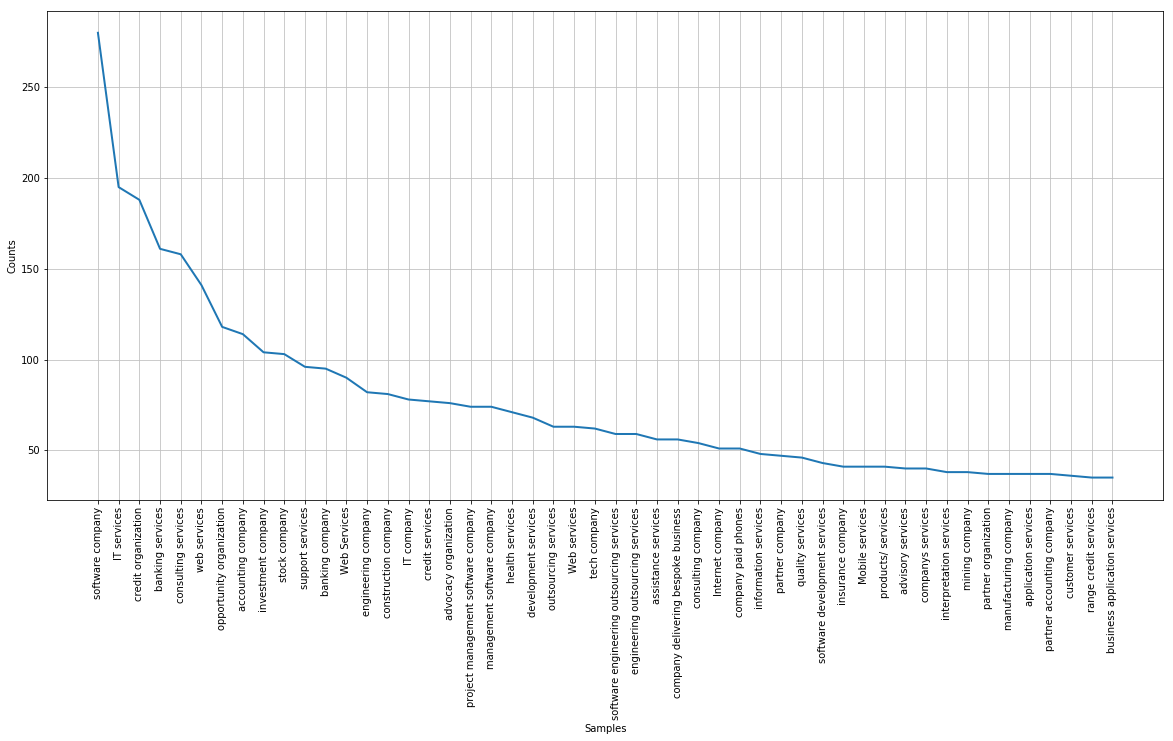

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 9))
fd = nltk.FreqDist(matched_sents)  # case sensitive!
fd.most_common(50)
fd.plot(50)

In [10]:
# Remove terms that are not useful in this context
matched_sents = [i for i in matched_sents if not ('development company' in i)]
matched_sents = [i for i in matched_sents if not ('profit organization' in i)]
matched_sents = [i for i in matched_sents if not ('development organization' in i)]
matched_sents = [i for i in matched_sents if not ('parent company' in i)]

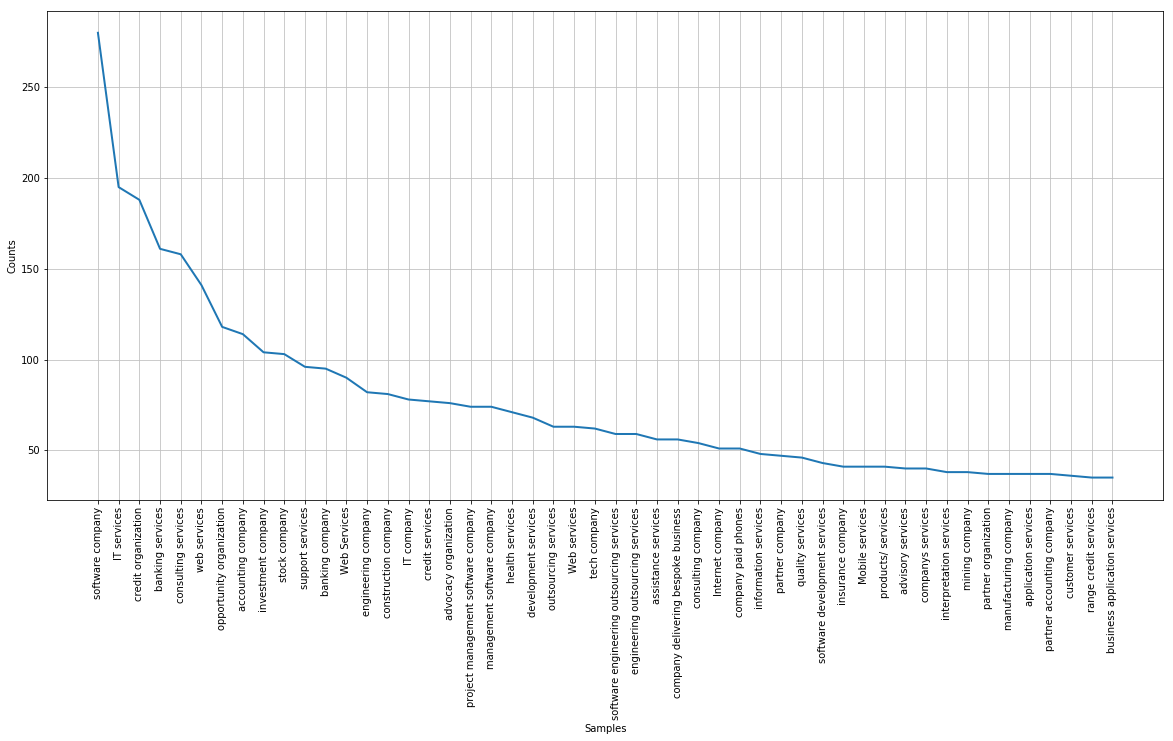

In [11]:
plt.figure(figsize=(20, 9))
fd = nltk.FreqDist(matched_sents)  # case sensitive!
fd.most_common(50)
fd.plot(50)

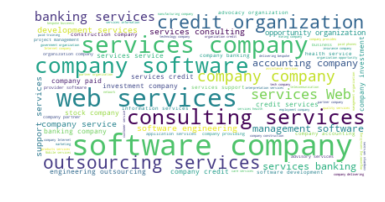

In [12]:
text_clean = " ".join(matched_sents)
import wordcloud
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

wc = WordCloud(background_color="white").generate(text_clean)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [51]:
def cleanup(token, lower = True):
    if lower:
       token = token.lower()
    return token.strip()

labels = set([w.label_ for w in doc.ents]) 
for label in labels: 
    entities = [cleanup(e.string, lower=False) for e in doc.ents if label==e.label_] 
    entities = list(set(entities)) 
    print (label,entities)

LOC ['Newtown']
GPE ['Germany', 'Hungary', 'Russia', 'the United States', 'Netherlands', 'UK', 'Singapore', 'Poland', 'Belarus', 'Canada', 'Armenia', 'Sweden', 'Kazakhstan', 'Switzerland', 'Ukraine']
ORG ['EPAM Systems, Inc.', 'PA', 'NYSE', 'the USA', 'EPAM']
